# Importing Libraries

In [1]:
import torch
#from torch import nn
#from torchvision import datasets, models, transforms
from torchvision import models, transforms

#import numpy as np

#import requests

import matplotlib as mpl
#import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from PIL import Image, ImageOps

#from git.repo.base import Repo
#from itertools import chain
#import random
import reprlib
import sys

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Other Notebook Parameters

In [5]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# Pre-installing Custom Functions

In [6]:
sys.path.append("../")

In [7]:
from Modules import *

In [8]:
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

In [9]:
#def tensor_to_image(tensor):
#    transform = transforms.ToPILImage()
#    return transform(tensor)
#
#
#def grayscale_image(image):
#    transform = transforms.Grayscale()
#    return transform(image)
#
#
#def grayscale_image_conversion(image):
#    transform = transforms.Compose([
#        transforms.Resize((224, 224)),
#        transforms.ToTensor(),
#        transforms.Normalize((0.5, ), (0.5, ))
#    ])
#    return transform(image)
#
#
#def grayscale_im_convert(tensor):
#    image = tensor_to_image(tensor)
#    image = grayscale_image(image)
#    tensor = grayscale_image_conversion(image).permute(1, 2, 0)
#    array = tensor.clone().detach().numpy()
#    array = array.reshape(array.shape[0], -1)
#    array = array * 0.5 + 0.5
#    array = array.clip(0, 1)
#    return array

# Loading Datasets

In [10]:
#data_path = "../Datasets/ants_and_bees/"
#
#try:
#    Repo.clone_from("https://github.com/jaddoescad/ants_and_bees", data_path)
#except:
#    NameError

# Practicing in Stages

## VGG19

In [11]:
VGG19 = models.vgg19(weights="DEFAULT").features

for param in VGG19.parameters():
    param.requires_grad_(False)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading the features of the pre-trained VGG19 model from PyTorch")

statements = [
    """
VGG19 = models.vgg19(weights="DEFAULT").features

for param in VGG19.parameters():
    param.requires_grad_(False)
"""
]
tabulation.statement_generator(statements)

variables = ["VGG19"]
values = [str(VGG19)]
tabulation.variable_generator(variables, values)

Loading the features of the pre-trained VGG19 model from PyTorch

    +--------------------------------------------------+
    | Statement                                        |
    +--------------------------------------------------+
    | VGG19 = models.vgg19(weights="DEFAULT").features |
    |                                                  |
    | for param in VGG19.parameters():                 |
    |     param.requires_grad_(False)                  |
    +--------------------------------------------------+
    +----------+-------------------------------------------------+
    | Variable | Value                                           |
    +----------+-------------------------------------------------+
    | VGG19    | Sequential(                                     |
    |          |   (0): Conv2d(3, 64, kernel_size=(3, 3),        |
    |          |         stride=(1, 1), padding=(1, 1))          |
    |          |   (1): ReLU(inplace=True)                       |
    |    

In [12]:
device = torch.device("mps:0" if torch.backends.mps.is_available() else "cpu")

model = VGG19.to(device)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Enabling GPU training acceleration for the pre-trained VGG19 model")

statements = [
    """
device = torch.device("mps:0" if torch.backends.mps.is_available() else "cpu")

model = VGG19.to(device)
"""
]
tabulation.statement_generator(statements)

variables = ["device", "model"]
values = [str(device), str(model)]
tabulation.variable_generator(variables, values)

expressions = ["device.index"]
results = [str(device.index)]
tabulation.expression_generator(expressions, results)

Enabling GPU training acceleration for the pre-trained VGG19 model

    +---------------------------------------------------+
    | Statement                                         |
    +---------------------------------------------------+
    | device = torch.device("mps:0" if                  |
    |     torch.backends.mps.is_available() else "cpu") |
    |                                                   |
    | model = VGG19.to(device)                          |
    +---------------------------------------------------+
    +----------+-------------------------------------------------+
    | Variable | Value                                           |
    +----------+-------------------------------------------------+
    | device   | mps:0                                           |
    | model    | Sequential(                                     |
    |          |   (0): Conv2d(3, 64, kernel_size=(3, 3),        |
    |          |         stride=(1, 1), padding=(1, 1))          |

## Image Transforms

In [13]:
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    image = in_transform(image).unsqueeze(0)

    return image


tabulation = Form_Generator()
tabulation.heading_printer(
    "Function definition to load an image from a specified file path")

definitions = [
    """
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    image = in_transform(image).unsqueeze(0)

    return image
"""
]
tabulation.definition_generator(definitions)

Function definition to load an image from a specified file path

    +----------------------------------------------------------+
    | Definition                                               |
    +----------------------------------------------------------+
    | def load_image(img_path, max_size=400, shape=None):      |
    |     image = Image.open(img_path).convert("RGB")          |
    |                                                          |
    |     if max(image.size) > max_size:                       |
    |         size = max_size                                  |
    |     else:                                                |
    |         size = max(image.size)                           |
    |                                                          |
    |     in_transform = transforms.Compose([                  |
    |         transforms.Resize(size),                         |
    |         transforms.ToTensor(),                           |
    |         transforms.

In [14]:
content_1 = load_image('../Images/City.jpg').to(device)
content_2 = load_image('../Images/MonaLisa.jpg').to(device)
style = load_image('../Images/StarryNight.jpg').to(device)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading and transformation of content and style images")

statements = [
    """
content_1 = load_image('../Images/City.jpg').to(device)
content_2 = load_image('../Images/MonaLisa.jpg').to(device)
style = load_image('../Images/StarryNight.jpg').to(device)
"""
]
tabulation.statement_generator(statements)

variables = ["content_1", "content_2", "style"]
values = [
    str(reprlib_rules.repr(content_1.cpu())),
    str(reprlib_rules.repr(content_2.cpu())),
    str(reprlib_rules.repr(style.cpu()))
]
tabulation.variable_generator(variables, values)

expressions = ["content_1.shape", "content_2.shape", "style.shape"]
results = [str(content_1.shape), str(content_2.shape), str(style.shape)]
tabulation.expression_generator(expressions, results)

Loading and transformation of content and style images

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | content_1 = load_image('../Images/City.jpg').to(device)     |
    | content_2 = load_image('../Images/MonaLisa.jpg').to(device) |
    | style = load_image('../Images/StarryNight.jpg').to(device)  |
    +-------------------------------------------------------------+
    +-----------+-------------------------------------------------+
    | Variable  | Value                                           |
    +-----------+-------------------------------------------------+
    | content_1 | tensor([[[[-0.7255, -0.7569, -0.7647,  ...,     |
    |           |         -0.7490, -0.7647, -0.7647],             |
    |           |           [-0.7333, -0.7490, -0.7255,  ...,     |
    |           |         -0.7490....6784, -0.6235,  ...,   

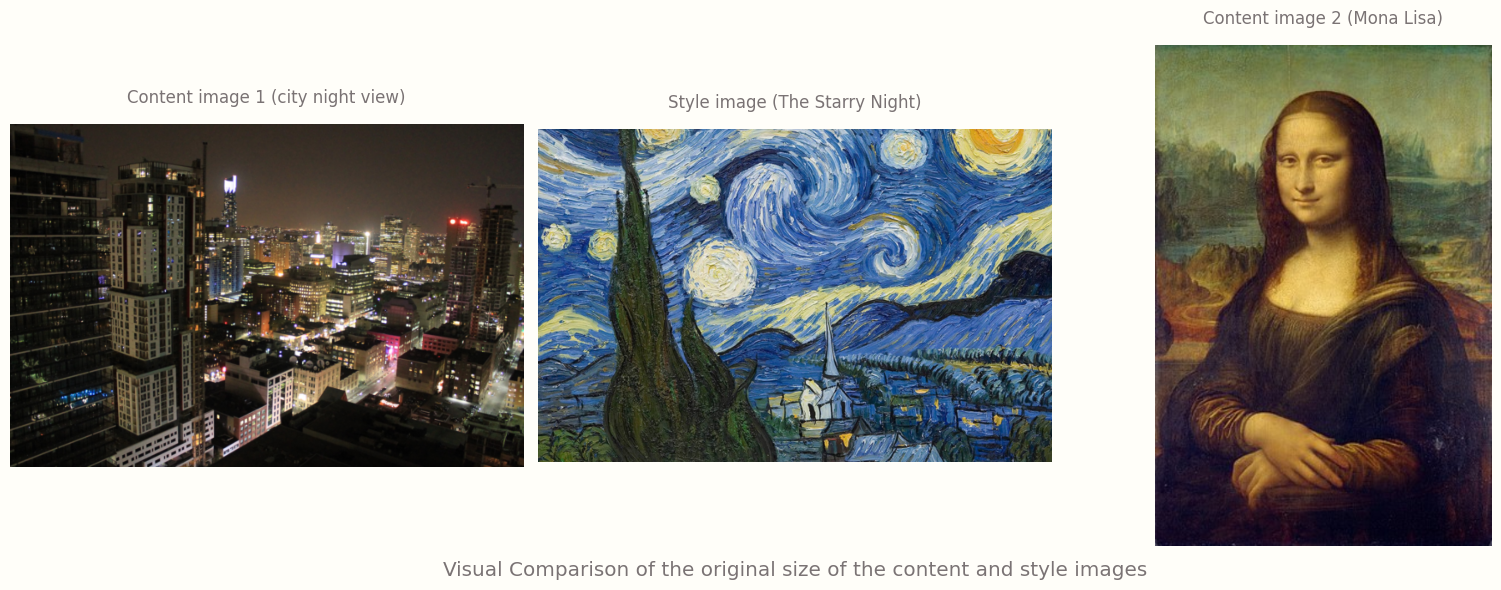

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1,
                                    3,
                                    figsize=(figure_size[0],
                                             figure_size[1] / 3 * 2))

ax1.imshow(im_convert(content_1.squeeze()))
ax1.set_title("Content image 1 (city night view)", loc="center", pad=15)
ax1.axis("off")

ax2.imshow(im_convert(style.squeeze()))
ax2.set_title("Style image (The Starry Night)", loc="center", pad=15)
ax2.axis("off")

ax3.imshow(im_convert(content_2.squeeze()))
ax3.set_title("Content image 2 (Mona Lisa)", loc="center", pad=15)
ax3.axis("off")

fig.suptitle(
    "Visual Comparison of the original size of the content and style images",
    fontsize="x-large",
    x=0.5,
    y=0)

plt.tight_layout()
plt.show()

In [21]:
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    if shape is not None:
        size = shape

    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    image = in_transform(image).unsqueeze(0)

    return image


tabulation = Form_Generator()
tabulation.heading_printer(
    "Function definition to load and resize an image from a specified file path"
)

definitions = [
    """
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    if shape is not None:
        size = shape

    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    image = in_transform(image).unsqueeze(0)

    return image
"""
]
tabulation.definition_generator(definitions)

Function definition to load and resize an image from a specified file path

    +----------------------------------------------------------+
    | Definition                                               |
    +----------------------------------------------------------+
    | def load_image(img_path, max_size=400, shape=None):      |
    |     image = Image.open(img_path).convert("RGB")          |
    |                                                          |
    |     if max(image.size) > max_size:                       |
    |         size = max_size                                  |
    |     else:                                                |
    |         size = max(image.size)                           |
    |                                                          |
    |     if shape is not None:                                |
    |         size = shape                                     |
    |                                                          |
    |     in_t

In [23]:
content_1 = load_image('../Images/City.jpg').to(device)
content_2 = load_image('../Images/MonaLisa.jpg').to(device)
style_1 = load_image('../Images/StarryNight.jpg',
                     shape=content_1.shape[-2:]).to(device)
style_2 = load_image('../Images/StarryNight.jpg',
                     shape=content_2.shape[-2:]).to(device)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading and transformation of content and style images")

statements = [
    """
content_1 = load_image('../Images/City.jpg').to(device)
content_2 = load_image('../Images/MonaLisa.jpg').to(device)
style_1 = load_image('../Images/StarryNight.jpg',
                     shape=content_1.shape[-2:]).to(device)
style_2 = load_image('../Images/StarryNight.jpg',
                     shape=content_2.shape[-2:]).to(device)
"""
]
tabulation.statement_generator(statements)

variables = ["content_1", "content_2", "style_1", "style_2"]
values = [
    str(reprlib_rules.repr(content_1.cpu())),
    str(reprlib_rules.repr(content_2.cpu())),
    str(reprlib_rules.repr(style_1.cpu())),
    str(reprlib_rules.repr(style_2.cpu()))
]
tabulation.variable_generator(variables, values)

expressions = [
    "content_1.shape", "content_2.shape", "style_1.shape", "style_2.shape"
]
results = [
    str(content_1.shape),
    str(content_2.shape),
    str(style_1.shape),
    str(style_2.shape)
]
tabulation.expression_generator(expressions, results)

Loading and transformation of content and style images

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | content_1 = load_image('../Images/City.jpg').to(device)     |
    | content_2 = load_image('../Images/MonaLisa.jpg').to(device) |
    | style_1 = load_image('../Images/StarryNight.jpg',           |
    |                      shape=content_1.shape[-2:]).to(device) |
    | style_2 = load_image('../Images/StarryNight.jpg',           |
    |                      shape=content_2.shape[-2:]).to(device) |
    +-------------------------------------------------------------+
    +-----------+-------------------------------------------------+
    | Variable  | Value                                           |
    +-----------+-------------------------------------------------+
    | content_1 | tensor([[[[-0.7255, -0.7569, -0.7647,  ...

transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=1, contrast=1, saturation=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

training_set = datasets.ImageFolder(root=data_path + "train",
                                    transform=transform_train)

validation_set = datasets.ImageFolder(root=data_path + "val",
                                      transform=transform)

training_loader = torch.utils.data.DataLoader(training_set,
                                              batch_size=20,
                                              shuffle=True)

validation_loader = torch.utils.data.DataLoader(validation_set,
                                                batch_size=20,
                                                shuffle=False)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading and transformation of local training and validation datasets")

statements = [
    """
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=1, contrast=1, saturation=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

training_set = datasets.ImageFolder(root=data_path + "train",
                                    transform=transform_train)

validation_set = datasets.ImageFolder(root=data_path + "val",
                                      transform=transform)

training_loader = torch.utils.data.DataLoader(training_set,
                                              batch_size=20,
                                              shuffle=True)

validation_loader = torch.utils.data.DataLoader(validation_set,
                                                batch_size=20,
                                                shuffle=False)
"""
]
tabulation.long_statement_generator(statements)

variables = [
    "transform_train",
    "transform",
    "training_set",
    "validation_set",
]
values = [
    str(transform_train),
    str(transform),
    str(reprlib_rules.repr(training_set)),
    str(reprlib_rules.repr(validation_set)),
]
tabulation.variable_generator(variables, values)

expressions = [
    "len(training_set)", "len(validation_set))", "len(training_loader)",
    "len(training_loader.dataset)", "list(training_loader)[0][0].shape",
    "list(training_loader)[0][1].shape",
    "next(iter(training_loader))[0].shape",
    "next(iter(training_loader))[1].shape", "len(validation_loader)",
    "len(validation_loader.dataset)", "list(validation_loader)[0][0].shape",
    "list(validation_loader)[0][1].shape",
    "next(iter(validation_loader))[0].shape",
    "next(iter(validation_loader))[1].shape"
]
results = [
    str(len(training_set)),
    str(len(validation_set)),
    str(len(training_loader)),
    str(len(training_loader.dataset)),
    str(list(training_loader)[0][0].shape),
    str(list(training_loader)[0][1].shape),
    str(next(iter(training_loader))[0].shape),
    str(next(iter(training_loader))[1].shape),
    str(len(validation_loader)),
    str(len(validation_loader.dataset)),
    str(list(validation_loader)[0][0].shape),
    str(list(validation_loader)[0][1].shape),
    str(next(iter(validation_loader))[0].shape),
    str(next(iter(validation_loader))[1].shape),
]
tabulation.expression_generator(expressions, results, 12)

colors = calm_color_generator(20)

classes = ("ant", "bee")

fig = plt.figure(figsize=(figure_size[0], figure_size[1] / 9 * 11),
                 constrained_layout=True)

gs = gridspec.GridSpec(nrows=4, ncols=5, figure=fig, wspace=.08, hspace=None)

dataiter = iter(training_loader)
images, labels = next(dataiter)

for idx in np.arange(20):
    bgcolor = colors.pop(0)
    ax = fig.add_subplot(gs[idx // 5, idx % 5],
                         xticks=[],
                         yticks=[],
                         frameon=False)
    title = classes[labels[idx].item()]
    if title in ["ant"]:
        title = title.center(51 - len(title))
    else:
        title = title.center(50 - len(title))
    ax.set_title(title,
                 loc="center",
                 pad=0,
                 backgroundcolor=bgcolor,
                 color=plt.rcParams["axes.facecolor"],
                 fontweight="heavy")

    axins1 = inset_axes(ax,
                        width="50%",
                        height="75%",
                        loc="upper left",
                        borderpad=0)
    axins1.set(xticks=[], yticks=[], frame_on=False)
    axins1.imshow(im_convert(images[idx]))
    axins1.set_xlabel("[original]",
                      loc="left",
                      labelpad=5,
                      color=bgcolor,
                      fontweight="bold")

    axins2 = inset_axes(ax,
                        width="50%",
                        height="75%",
                        loc="upper right",
                        borderpad=0)
    axins2.set(xticks=[], yticks=[], frame_on=False)
    axins2.imshow(grayscale_im_convert(images[idx]), cmap="binary_r")
    axins2.set_xlabel("[grayscale]",
                      loc="right",
                      labelpad=5,
                      color=bgcolor,
                      fontweight="bold")

fig.suptitle(
    "Plotting of the 20 shuffled images of ants and bees in the first batch",
    fontsize="x-large",
    x=0.5,
    y=0)

plt.show()

AlexNet = models.alexnet(weights="DEFAULT")

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading the pre-trained AlexNet model from PyTorch")

statements = ["""
AlexNet = models.alexnet(weights="DEFAULT")
"""]
tabulation.statement_generator(statements)

variables = ["AlexNet"]
values = [str(AlexNet)]
tabulation.variable_generator(variables, values)

expressions = [
    "len(AlexNet.features)", "len(AlexNet.classifier)",
    "AlexNet.classifier[6].in_features", "AlexNet.classifier[6].out_features"
]
results = [
    str(len(AlexNet.features)),
    str(len(AlexNet.classifier)),
    str(AlexNet.classifier[6].in_features),
    str(AlexNet.classifier[6].out_features)
]
tabulation.expression_generator(expressions, results)

for param in AlexNet.features.parameters():
    param.requires_grad = False

n_inputs = AlexNet.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
AlexNet.classifier[6] = last_layer

tabulation = Form_Generator()
tabulation.heading_printer(
    "Modification of pre-trained AlexNet model to fit local datasets")

statements = [
    """
for param in AlexNet.features.parameters():
    param.requires_grad = False

n_inputs = AlexNet.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
AlexNet.classifier[6] = last_layer
"""
]
tabulation.statement_generator(statements)

variables = ["n_inputs", "last_layer", "AlexNet"]
values = [str(n_inputs), str(last_layer), str(AlexNet)]
tabulation.variable_generator(variables, values)

expressions = [
    "len(AlexNet.features)", "len(AlexNet.classifier)",
    "AlexNet.classifier[6].in_features", "AlexNet.classifier[6].out_features"
]
results = [
    str(len(AlexNet.features)),
    str(len(AlexNet.classifier)),
    str(AlexNet.classifier[6].in_features),
    str(AlexNet.classifier[6].out_features)
]
tabulation.expression_generator(expressions, results)

model = AlexNet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Initialization of neural module, criterion and optimizer")

statements = [
    """
model = AlexNet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
"""
]
tabulation.statement_generator(statements)

variables = ["model", "criterion", "optimizer"]
values = [str(model), str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

epochs = 10
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

dataframe = DataFrame_Generator("epoch", "loss", "accuracy", "validation loss",
                                "validation accuracy")

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader.dataset) * 100
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(
            validation_loader.dataset) * 100
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())

        dataframe.updater(e + 1, epoch_loss, epoch_accu.item(), val_epoch_loss,
                          val_epoch_accu.item())

tabulation = Form_Generator()
tabulation.heading_printer(
    "Training and testing of pre-trained AlexNet model using local datasets")

statements = [
    """
epochs = 10
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader.dataset) * 100
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(
            validation_loader.dataset) * 100
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())
"""
]
tabulation.statement_generator(statements)

variables = [
    "epochs", "running_loss_history", "running_accu_history",
    "val_running_loss_history", "val_running_accu_history"
]
values = [
    str(epochs),
    str(
        reprlib_rules.repr(
            [np.round(loss, 4) for loss in running_loss_history])),
    str(
        reprlib_rules.repr(
            [np.round(accu, 4) for accu in running_accu_history])),
    str(
        reprlib_rules.repr(
            [np.round(loss, 4) for loss in val_running_loss_history])),
    str(
        reprlib_rules.repr(
            [np.round(accu, 4) for accu in val_running_accu_history]))
]
tabulation.variable_generator(variables, values, expandtabs=1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

url_ant = ("https://live.staticflickr.com/140/"
           "379379222_24e134c461_b.jpg")
url_bee = ("https://live.staticflickr.com/5028/"
           "5630181321_7de454e707_b.jpg")

response_ant = requests.get(url_ant, stream=True)
img_ant = Image.open(response_ant.raw)

response_bee = requests.get(url_bee, stream=True)
img_bee = Image.open(response_bee.raw)

tabulation = Form_Generator()
tabulation.heading_printer("Web image grabbing")

statements = [
    """
url_ant = ("https://live.staticflickr.com/140/"
           "379379222_24e134c461_b.jpg")
url_bee = ("https://live.staticflickr.com/5028/"
           "5630181321_7de454e707_b.jpg")

response_ant = requests.get(url_ant, stream=True)
img_ant = Image.open(response_ant.raw)

response_bee = requests.get(url_bee, stream=True)
img_bee = Image.open(response_bee.raw)
"""
]
tabulation.statement_generator(statements)

variables = ["response_ant", "response_bee"]
values = [str(response_ant), str(response_bee)]
tabulation.variable_generator(variables, values)

expressions = [
    "np.array(img_ant)", "np.array(img_ant).shape", "np.array(img_bee)",
    "np.array(img_bee).shape"
]
results = [
    str(reprlib_rules.repr(np.array(img_ant))),
    str(np.array(img_ant).shape),
    str(reprlib_rules.repr(np.array(img_bee))),
    str(np.array(img_bee).shape)
]
tabulation.expression_generator(expressions, results)

plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] * 2)

fig, axs = plt.subplots(4, 3)

axs[0, 0].imshow(img_ant)
axs[0, 0].set_title("Original image (ant)", loc="center", pad=15)

inverted_img_ant = ImageOps.invert(img_ant)
axs[0, 1].imshow(inverted_img_ant)
axs[0, 1].set_title("Inverted image (ant)", loc="center", pad=15)

transformed_img_ant = transform(img_ant)
axs[0, 2].imshow(im_convert(transformed_img_ant))
axs[0, 2].set_title("Transformed image (ant)", loc="center", pad=15)

grayscale_img_ant = grayscale_image(img_ant)
axs[1, 0].imshow(grayscale_img_ant, cmap="binary_r")
axs[1, 0].set_title("Grayscale image (ant)", loc="center", pad=15)

axs[1, 1].imshow(grayscale_img_ant, cmap="binary")
axs[1, 1].set_title("Inverted grayscale image (ant)", loc="center", pad=15)

transformed_grayscale_img_ant = grayscale_image_conversion(
    grayscale_img_ant).permute(1, 2, 0)
axs[1, 2].imshow(transformed_grayscale_img_ant, cmap="binary_r")
axs[1, 2].set_title("Transformed grayscale image (ant)", loc="center", pad=15)

axs[2, 0].imshow(img_bee)
axs[2, 0].set_title("Original image (bee)", loc="center", pad=15)

inverted_img_bee = ImageOps.invert(img_bee)
axs[2, 1].imshow(inverted_img_bee)
axs[2, 1].set_title("Inverted image (bee)", loc="center", pad=15)

transformed_img_bee = transform(img_bee)
axs[2, 2].imshow(im_convert(transformed_img_bee))
axs[2, 2].set_title("Transformed image (bee)", loc="center", pad=15)

grayscale_img_bee = grayscale_image(img_bee)
axs[3, 0].imshow(grayscale_img_bee, cmap="binary_r")
axs[3, 0].set_title("Grayscale image (bee)", loc="center", pad=15)

axs[3, 1].imshow(grayscale_img_bee, cmap="binary")
axs[3, 1].set_title("Inverted grayscale image (bee)", loc="center", pad=15)

transformed_grayscale_img_bee = grayscale_image_conversion(
    grayscale_img_bee).permute(1, 2, 0)
axs[3, 2].imshow(transformed_grayscale_img_bee, cmap="binary_r")
axs[3, 2].set_title("Transformed grayscale image (bee)", loc="center", pad=15)

fig.suptitle("Visual Comparison of Different Forms of Grabbed Web Images",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

img_ant = transform(img_ant).to(device).unsqueeze(0)
img_bee = transform(img_bee).to(device).unsqueeze(0)

output_ant = model(img_ant)
_ant, pred_ant = torch.max(output_ant, 1)

output_bee = model(img_bee)
_bee, pred_bee = torch.max(output_bee, 1)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Test of the classification model with web-scraped image")

statements = [
    """
img_ant = transform(img_ant).to(device).unsqueeze(0)
img_bee = transform(img_bee).to(device).unsqueeze(0)

output_ant = model(img_ant)
_ant, pred_ant = torch.max(output_ant, 1)

output_bee = model(img_bee)
_bee, pred_bee = torch.max(output_bee, 1)
"""
]
tabulation.statement_generator(statements)

variables = [
    "img_ant", "output_ant", "_ant", "pred_ant", "img_bee", "output_bee",
    "_bee", "pred_bee"
]
values = [
    str(reprlib_rules.repr(img_ant.cpu())),
    str(output_ant.cpu()),
    str(_ant.cpu()),
    str(pred_ant.cpu()),
    str(reprlib_rules.repr(img_bee.cpu())),
    str(output_bee.cpu()),
    str(_bee.cpu()),
    str(pred_bee.cpu())
]
tabulation.variable_generator(variables, values)

expressions = [
    "img_ant.shape", "torch.max(output_ant, 0)", "torch.max(output_ant, 1)",
    "pred_ant.item()", "classes[pred_ant.item()]", "img_bee.shape",
    "torch.max(output_bee, 0)", "torch.max(output_bee, 1)", "pred_bee.item()",
    "classes[pred_bee.item()]"
]
results = [
    str(img_ant.shape),
    str(torch.max(output_ant.cpu(), 0)),
    str(torch.max(output_ant.cpu(), 1)),
    str(pred_ant.item()), classes[pred_ant.item()],
    str(img_bee.shape),
    str(torch.max(output_bee.cpu(), 0)),
    str(torch.max(output_bee.cpu(), 1)),
    str(pred_bee.item()), classes[pred_bee.item()]
]
tabulation.expression_generator(expressions, results)

def loader_training_iterations_CNN(lr, criterion, optimizer_type, **kwargs):
    criterion = criterion
    optimizer = optimizer_type(model.parameters(), lr, **kwargs)
    running_loss = 0.0
    running_accu = 0
    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)
    else:
        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader.dataset) * 100
    return epoch_loss, epoch_accu


def loader_validation_iterations_CNN(lr, criterion):
    criterion = criterion
    val_running_loss = 0.0
    val_running_accu = 0
    with torch.no_grad():
        for val_inputs, val_labels in validation_loader:
            val_inputs = val_inputs.to(device)
            val_labels = val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
            _, val_preds = torch.max(val_outputs, 1)
            val_running_loss += val_loss.item()
            val_running_accu += torch.sum(val_preds == val_labels.data)
        else:
            val_epoch_loss = val_running_loss / len(validation_loader)
            val_epoch_accu = val_running_accu.float() / len(
                validation_loader.dataset) * 100
    return val_epoch_loss, val_epoch_accu


def validation_iterations_CNN(epochs,
                              lr,
                              criterion=nn.CrossEntropyLoss(),
                              optimizer_type=torch.optim.Adam,
                              **kwargs):
    epochs = epochs
    loss = []
    accu = []
    val_loss = []
    val_accu = []
    for e in range(epochs):
        epoch_loss, epoch_accu = loader_training_iterations_CNN(
            lr, criterion, optimizer_type, **kwargs)
        val_epoch_loss, val_epoch_accu = loader_validation_iterations_CNN(
            lr, criterion)
        loss.append(epoch_loss)
        accu.append(epoch_accu.item())
        val_loss.append(val_epoch_loss)
        val_accu.append(val_epoch_accu.item())
    return loss, accu, val_loss, val_accu


colors = calm_color_generator(16)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 2, sharex=True)

lr_list = [0.01, 0.001, 0.0005, 0.0001]

for i in range(2):
    for j in range(2):
        model = AlexNet.to(device)
        loss, accu, val_loss, val_accu = validation_iterations_CNN(
            epochs=epochs, lr=lr_list[i * 2 + j])
        line1 = axs[i, j].plot(range(1, epochs + 1),
                               loss,
                               label="training loss",
                               linestyle=":",
                               c=colors.pop(0))
        line2 = axs[i, j].plot(range(1, epochs + 1),
                               val_loss,
                               label="validation loss",
                               linestyle="-.",
                               c=colors.pop(0))
        axs[i, j].set(xlabel="epoch", ylabel="loss")
        axs[i, j] = axs[i, j].twinx()
        line3 = axs[i, j].plot(range(1, epochs + 1),
                               accu,
                               label="training accuracy",
                               linestyle="--",
                               c=colors.pop(0))
        line4 = axs[i, j].plot(range(1, epochs + 1),
                               val_accu,
                               label="validation accuracy",
                               c=colors.pop(0))
        axs[i, j].set(ylabel="accuracy (%)")
        lines = line1 + line2 + line3 + line4
        labels = [line.get_label() for line in lines]
        axs[i, j].legend(lines, labels, loc="lower left", borderpad=1, ncol=2)

for ax, lr in zip(axs.flat, lr_list):
    ax.set_title("Learning rate = {}".format(lr), loc="center", pad=15)

fig.suptitle(
    "Visual Comparison of Model Testing with Different Learning Rates",
    fontsize="x-large",
    x=0.5,
    y=0)

plt.tight_layout()
plt.show()

def random_image_list(n):
    global validation_loader
    image_list = random.sample(list(validation_loader.dataset), n)
    images = torch.stack(list(map(lambda x: x[0], image_list)))
    labels = torch.tensor(list(map(lambda x: x[1], image_list)))
    return images, labels


colors = calm_color_generator(80)
fig = plt.figure(figsize=(figure_size[0], figure_size[1] * 2),
                 constrained_layout=True)

gs = gridspec.GridSpec(nrows=4, ncols=1, figure=fig, wspace=None, hspace=.2)

bbox_props = dict(boxstyle="round",
                  fc=plt.rcParams["axes.facecolor"],
                  ec="0.5",
                  alpha=0.67)

images, labels = random_image_list(20)
images_ = images.to(device)
labels = labels.to(device)

for idx, lr in zip(np.arange(4), lr_list):
    model = AlexNet.to(device)
    validation_iterations_CNN(epochs=epochs, lr=lr)
    outputs = model(images_)
    _, preds = torch.max(outputs, 1)
    title = "Learning rate = {}".format(lr).center(40, " ")
    ax = fig.add_subplot(gs[idx], xticks=[], yticks=[], frameon=False)
    ax.set_title(title,
                 y=.875,
                 loc="center",
                 pad=0,
                 fontweight="heavy",
                 bbox=bbox_props)

    for k in range(20):
        bgcolor = colors.pop(0)
        exec(f"axins{k} = ax.inset_axes([0.1 * (k % 10), -0.8 * (k // 10), \
        0.1, 0.6])")
        exec(f"axins{k}.set(xticks=[], yticks=[], frame_on=False)")
        exec(f"axins{k}.imshow(im_convert(images[k])) if preds[k] == \
        labels[k] else axins{k}.imshow(grayscale_im_convert(images[k]), \
        cmap=\"binary\")")

        sub_title_1 = f"{classes[preds[k].item()]}"
        sub_title_2 = f"({classes[labels[k].item()]})"
        sub_title = sub_title_1 + "  " + sub_title_2
        if sub_title_1 in ["ant"]:
            sub_title = sub_title.center(28 - len(sub_title))
        else:
            sub_title = sub_title.center(27 - len(sub_title))

        exec(f"axins{k}.set_title(sub_title, y=1.025, loc=\"center\", \
        color=(plt.rcParams[\"axes.facecolor\"] if preds[k] == labels[k] \
        else bgcolor), backgroundcolor=(bgcolor if preds[k] == labels[k] \
        else plt.rcParams[\"axes.facecolor\"]), fontweight=\"bold\")")

fig.suptitle(
    "Visual Comparison of Model Testing Effect under Different Learning Rates",
    fontsize="x-large",
    x=0.5,
    y=-0.05)

plt.show()

VGG16 = models.vgg16(weights="DEFAULT")

tabulation = Form_Generator()
tabulation.heading_printer("Loading the pre-trained VGG16 model from PyTorch")

statements = ["""
VGG16 = models.vgg16(weights="DEFAULT")
"""]
tabulation.statement_generator(statements)

variables = ["VGG16"]
values = [str(VGG16)]
tabulation.variable_generator(variables, values)

expressions = [
    "len(VGG16.features)", "len(VGG16.classifier)",
    "VGG16.classifier[6].in_features", "VGG16.classifier[6].out_features"
]
results = [
    str(len(VGG16.features)),
    str(len(VGG16.classifier)),
    str(VGG16.classifier[6].in_features),
    str(VGG16.classifier[6].out_features)
]
tabulation.expression_generator(expressions, results)

for param in VGG16.features.parameters():
    param.requires_grad = False

n_inputs = VGG16.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
VGG16.classifier[6] = last_layer

tabulation = Form_Generator()
tabulation.heading_printer(
    "Modification of pre-trained VGG16 model to fit local datasets")

statements = [
    """
for param in VGG16.features.parameters():
    param.requires_grad = False

n_inputs = VGG16.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
VGG16.classifier[6] = last_layer
"""
]
tabulation.statement_generator(statements)

variables = ["n_inputs", "last_layer", "VGG16"]
values = [str(n_inputs), str(last_layer), str(VGG16)]
tabulation.variable_generator(variables, values)

expressions = [
    "len(VGG16.features)", "len(VGG16.classifier)",
    "VGG16.classifier[6].in_features", "VGG16.classifier[6].out_features"
]
results = [
    str(len(VGG16.features)),
    str(len(VGG16.classifier)),
    str(VGG16.classifier[6].in_features),
    str(VGG16.classifier[6].out_features)
]
tabulation.expression_generator(expressions, results)

model = VGG16.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Initialization of neural module, criterion and optimizer")

statements = [
    """
model = VGG16.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
"""
]
tabulation.statement_generator(statements)

variables = ["model", "criterion", "optimizer"]
values = [str(model), str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

dataframe = DataFrame_Generator("epoch", "loss", "accuracy", "validation loss",
                                "validation accuracy")

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader.dataset) * 100
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(
            validation_loader.dataset) * 100
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())

        dataframe.updater(e + 1, epoch_loss, epoch_accu.item(), val_epoch_loss,
                          val_epoch_accu.item())

tabulation = Form_Generator()
tabulation.heading_printer(
    "Training and testing of pre-trained AlexNet model using local datasets")

statements = [
    """
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader.dataset) * 100
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(
            validation_loader.dataset) * 100
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())
"""
]
tabulation.statement_generator(statements)

variables = [
    "epochs", "running_loss_history", "running_accu_history",
    "val_running_loss_history", "val_running_accu_history"
]
values = [
    str(epochs),
    str(
        reprlib_rules.repr(
            [np.round(loss, 4) for loss in running_loss_history])),
    str(
        reprlib_rules.repr(
            [np.round(accu, 4) for accu in running_accu_history])),
    str(
        reprlib_rules.repr(
            [np.round(loss, 4) for loss in val_running_loss_history])),
    str(
        reprlib_rules.repr(
            [np.round(accu, 4) for accu in val_running_accu_history]))
]
tabulation.variable_generator(variables, values, expandtabs=1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

output_ant = model(img_ant)
_ant, pred_ant = torch.max(output_ant, 1)

output_bee = model(img_bee)
_bee, pred_bee = torch.max(output_bee, 1)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Test of the classification model with web-scraped image")

statements = [
    """
img_ant = transform(img_ant).to(device).unsqueeze(0)
img_bee = transform(img_bee).to(device).unsqueeze(0)

output_ant = model(img_ant)
_ant, pred_ant = torch.max(output_ant, 1)

output_bee = model(img_bee)
_bee, pred_bee = torch.max(output_bee, 1)
"""
]
tabulation.statement_generator(statements)

variables = [
    "img_ant", "output_ant", "_ant", "pred_ant", "img_bee", "output_bee",
    "_bee", "pred_bee"
]
values = [
    str(reprlib_rules.repr(img_ant.cpu())),
    str(output_ant.cpu()),
    str(_ant.cpu()),
    str(pred_ant.cpu()),
    str(reprlib_rules.repr(img_bee.cpu())),
    str(output_bee.cpu()),
    str(_bee.cpu()),
    str(pred_bee.cpu())
]
tabulation.variable_generator(variables, values)

expressions = [
    "img_ant.shape", "torch.max(output_ant, 0)", "torch.max(output_ant, 1)",
    "pred_ant.item()", "classes[pred_ant.item()]", "img_bee.shape",
    "torch.max(output_bee, 0)", "torch.max(output_bee, 1)", "pred_bee.item()",
    "classes[pred_bee.item()]"
]
results = [
    str(img_ant.shape),
    str(torch.max(output_ant.cpu(), 0)),
    str(torch.max(output_ant.cpu(), 1)),
    str(pred_ant.item()), classes[pred_ant.item()],
    str(img_bee.shape),
    str(torch.max(output_bee.cpu(), 0)),
    str(torch.max(output_bee.cpu(), 1)),
    str(pred_bee.item()), classes[pred_bee.item()]
]
tabulation.expression_generator(expressions, results)

colors = calm_color_generator(16)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 2)

epochs_list = [10, 5]

for i in range(2):
    for j in range(2):
        epochs = epochs_list[j]
        model = VGG16.to(device)
        loss, accu, val_loss, val_accu = validation_iterations_CNN(
            epochs=epochs, lr=lr_list[2 + i])
        line1 = axs[i, j].plot(range(1, epochs + 1),
                               loss,
                               label="training loss",
                               linestyle=":",
                               c=colors.pop(0))
        line2 = axs[i, j].plot(range(1, epochs + 1),
                               val_loss,
                               label="validation loss",
                               linestyle="-.",
                               c=colors.pop(0))
        axs[i, j].set(xlabel="epoch", ylabel="loss")
        axs[i, j] = axs[i, j].twinx()
        line3 = axs[i, j].plot(range(1, epochs + 1),
                               accu,
                               label="training accuracy",
                               linestyle="--",
                               c=colors.pop(0))
        line4 = axs[i, j].plot(range(1, epochs + 1),
                               val_accu,
                               label="validation accuracy",
                               c=colors.pop(0))
        axs[i, j].set(ylabel="accuracy (%)")
        lines = line1 + line2 + line3 + line4
        labels = [line.get_label() for line in lines]
        axs[i, j].legend(lines, labels, loc="lower left", borderpad=1, ncol=2)

epochs_list_ = epochs_list * 2
lr_list_ = list(chain.from_iterable(zip(*[lr_list[2:]] * 2)))

for ax, epochs, lr in zip(axs.flat, epochs_list_, lr_list_):
    ax.set_title("Number of epochs = {}, learning rate = {}".format(
        epochs, lr),
                 loc="center",
                 pad=15)

fig.suptitle(
    "Visual Comparison of Model Testing with Different Learning Rates "
    "and / or Different Number of Epochs",
    fontsize="x-large",
    x=0.5,
    y=0)

plt.tight_layout()
plt.show()

epochs = 5

tabulation = Form_Generator()
tabulation.heading_printer("Reducing training epochs to avoid overfitting")

statements = ["""
epochs = 5
"""]
tabulation.statement_generator(statements)

variables = ["epochs"]
values = [str(epochs)]
tabulation.variable_generator(variables, values)

colors = calm_color_generator(16)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 2, sharex=True)

for i in range(2):
    for j in range(2):
        model = VGG16.to(device)
        loss, accu, val_loss, val_accu = validation_iterations_CNN(
            epochs=epochs, lr=lr_list[i * 2 + j])
        line1 = axs[i, j].plot(range(1, epochs + 1),
                               loss,
                               label="training loss",
                               linestyle=":",
                               c=colors.pop(0))
        line2 = axs[i, j].plot(range(1, epochs + 1),
                               val_loss,
                               label="validation loss",
                               linestyle="-.",
                               c=colors.pop(0))
        axs[i, j].set(xlabel="epoch", ylabel="loss")
        axs[i, j] = axs[i, j].twinx()
        line3 = axs[i, j].plot(range(1, epochs + 1),
                               accu,
                               label="training accuracy",
                               linestyle="--",
                               c=colors.pop(0))
        line4 = axs[i, j].plot(range(1, epochs + 1),
                               val_accu,
                               label="validation accuracy",
                               c=colors.pop(0))
        axs[i, j].set(ylabel="accuracy (%)")
        lines = line1 + line2 + line3 + line4
        labels = [line.get_label() for line in lines]
        axs[i, j].legend(lines, labels, loc="lower left", borderpad=1, ncol=2)

for ax, lr in zip(axs.flat, lr_list):
    ax.set_title("Learning rate = {}".format(lr), loc="center", pad=15)

fig.suptitle(
    "Visual Comparison of Model Testing with Different Learning Rates",
    fontsize="x-large",
    x=0.5,
    y=0)

plt.tight_layout()
plt.show()

colors = calm_color_generator(80)
fig = plt.figure(figsize=(figure_size[0], figure_size[1] * 2),
                 constrained_layout=True)

gs = gridspec.GridSpec(nrows=4, ncols=1, figure=fig, wspace=None, hspace=.2)

bbox_props = dict(boxstyle="round",
                  fc=plt.rcParams["axes.facecolor"],
                  ec="0.5",
                  alpha=0.67)

images, labels = random_image_list(20)
images_ = images.to(device)
labels = labels.to(device)

for idx, lr in zip(np.arange(4), lr_list):
    model = AlexNet.to(device)
    validation_iterations_CNN(epochs=epochs, lr=lr)
    outputs = model(images_)
    _, preds = torch.max(outputs, 1)
    title = "Learning rate = {}".format(lr).center(40, " ")
    ax = fig.add_subplot(gs[idx], xticks=[], yticks=[], frameon=False)
    ax.set_title(title,
                 y=.875,
                 loc="center",
                 pad=0,
                 fontweight="heavy",
                 bbox=bbox_props)

    for k in range(20):
        bgcolor = colors.pop(0)
        exec(f"axins{k} = ax.inset_axes([0.1 * (k % 10), -0.8 * (k // 10), \
        0.1, 0.6])")
        exec(f"axins{k}.set(xticks=[], yticks=[], frame_on=False)")
        exec(f"axins{k}.imshow(im_convert(images[k])) if preds[k] == \
        labels[k] else axins{k}.imshow(grayscale_im_convert(images[k]), \
        cmap=\"binary\")")

        sub_title_1 = f"{classes[preds[k].item()]}"
        sub_title_2 = f"({classes[labels[k].item()]})"
        sub_title = sub_title_1 + "  " + sub_title_2
        if sub_title_1 in ["ant"]:
            sub_title = sub_title.center(28 - len(sub_title))
        else:
            sub_title = sub_title.center(27 - len(sub_title))

        exec(f"axins{k}.set_title(sub_title, y=1.025, loc=\"center\", \
        color=(plt.rcParams[\"axes.facecolor\"] if preds[k] == labels[k] \
        else bgcolor), backgroundcolor=(bgcolor if preds[k] == labels[k] \
        else plt.rcParams[\"axes.facecolor\"]), fontweight=\"bold\")")

fig.suptitle(
    "Visual Comparison of Model Testing Effect under Different Learning Rates",
    fontsize="x-large",
    x=0.5,
    y=-0.05)

plt.show()

colors = calm_color_generator(100)
fig = plt.figure(figsize=(figure_size[0], figure_size[1] * 2),
                 constrained_layout=True)

gs = gridspec.GridSpec(nrows=10, ncols=2, figure=fig, wspace=.05, hspace=None)

bbox_props = dict(boxstyle="round",
                  fc=plt.rcParams["axes.facecolor"],
                  ec="0.5",
                  alpha=0.67)

images, labels = random_image_list(50)
images_ = images.to(device)
labels = labels.to(device)

axis_titles = ["AlexNet Architecture", "VGG16 Architecture"]

for idx, title in zip(np.arange(2), axis_titles):
    if idx == 0:
        epochs = 10
        model = AlexNet.to(device)
        validation_iterations_CNN(epochs=epochs, lr=lr_list[3])
    else:
        epochs = 5
        model = VGG16.to(device)
        validation_iterations_CNN(epochs=epochs, lr=lr_list[3])

    outputs = model(images_)
    _, preds = torch.max(outputs, 1)
    title = title.center(40, " ")
    ax = fig.add_subplot(gs[idx], xticks=[], yticks=[], frameon=False)
    ax.set_title(title,
                 y=1.6,
                 loc="center",
                 pad=0,
                 fontweight="heavy",
                 bbox=bbox_props)

    for k in range(50):
        bgcolor = colors.pop(0)
        exec(f"axins{k} = ax.inset_axes([0.2 * (k % 5), -1.4 * (k // 5), \
        0.189, 1.3])")
        exec(f"axins{k}.set(xticks=[], yticks=[], frame_on=False)")
        exec(f"axins{k}.imshow(im_convert(images[k])) if preds[k] == \
        labels[k] else axins{k}.imshow(grayscale_im_convert(images[k]), \
        cmap=\"binary\")")

        sub_title_1 = f"{classes[preds[k].item()]}"
        sub_title_2 = f"({classes[labels[k].item()]})"
        sub_title = sub_title_1 + "  " + sub_title_2
        if sub_title_1 in ["ant"]:
            sub_title = sub_title.center(28 - len(sub_title))
        else:
            sub_title = sub_title.center(27 - len(sub_title))

        exec(f"axins{k}.set_title(sub_title, y=1.025, loc=\"center\", \
        color=(plt.rcParams[\"axes.facecolor\"] if preds[k] == labels[k] \
        else bgcolor), backgroundcolor=(bgcolor if preds[k] == labels[k] \
        else plt.rcParams[\"axes.facecolor\"]), fontweight=\"bold\")")

fig.suptitle(
    "Visual Comparison of Model Testing Effect under Different "
    "Convolutional Neural Networks Architectures",
    fontsize="x-large",
    x=0.5,
    y=-0.125)

plt.show()